In [17]:
%pylab inline
from pandas import Series, DataFrame
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
import matplotlib.pyplot as plt

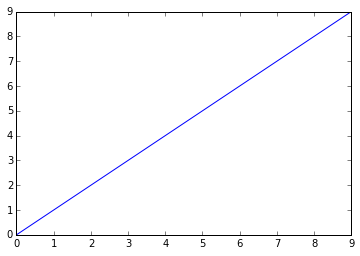

In [2]:
plot(np.arange(10))

In [49]:
fig = plt.figure()

In [50]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

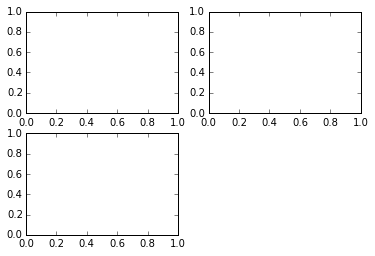

In [51]:
fig

In [52]:
ax3

In [55]:
ax3.plot(randn(50).cumsum(), 'k--')

In [35]:
plt.figure(0)

In [56]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

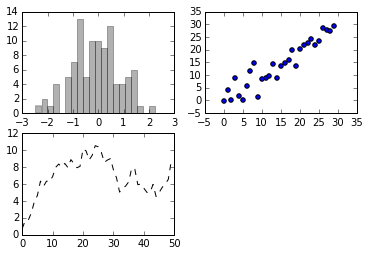

In [59]:
fig

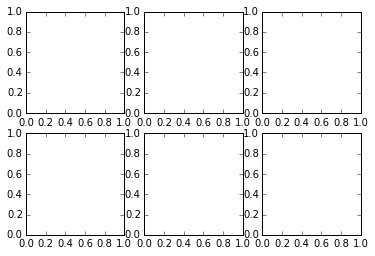

In [15]:
fig, axes = plt.subplots(2, 3)

In [13]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107fc2b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10839fe10>]], dtype=object)

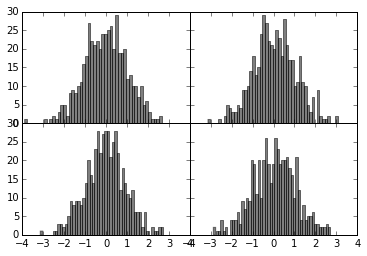

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) 
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

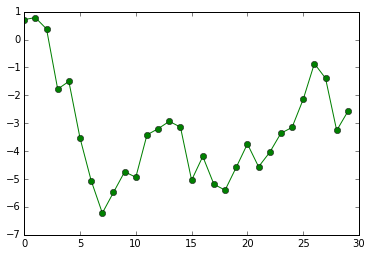

In [63]:
plt.plot(randn(30).cumsum(), 'go-')

(0.0, 1.0)

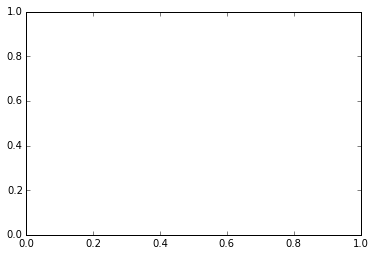

In [74]:
plt.xlim()

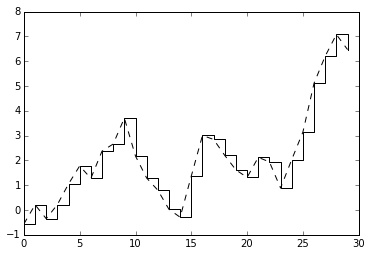

In [89]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [91]:
_.xlim()

AttributeError: 'list' object has no attribute 'xlim'

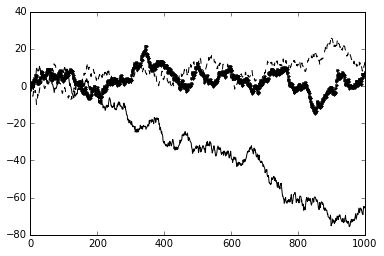

In [92]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [93]:
ax.legend(loc='best')

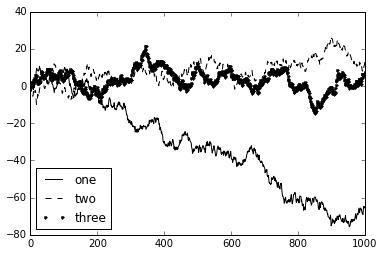

In [94]:
fig

In [123]:
plt.rc('figure', figsize=(20, 8))

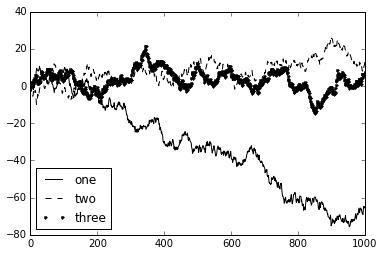

In [98]:
fig

In [102]:
current_path=!pwd
current_path=current_path[0]
current_path

'/Users/flashhack/Workspace/Study/Pandas'

In [104]:
close_px_all = pd.read_csv(current_path+'/pydata-book/ch09/stock_px.csv', parse_dates=True, index_col=0)

In [106]:
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [108]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


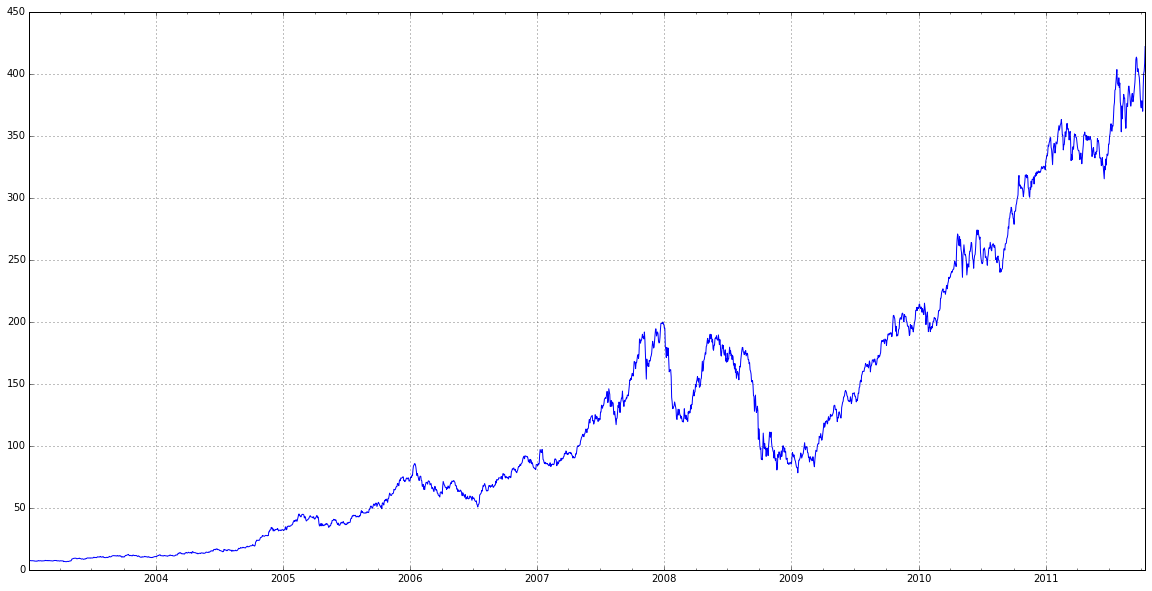

In [116]:
close_px['AAPL'].plot()

In [112]:
close_px.ix['2009'].tail()

,AAPL,MSFT,XOM
2009-12-25,209.04,29.80,65.69
2009-12-28,211.61,29.97,66.10
2009-12-29,209.10,30.18,65.87
2009-12-30,211.64,29.77,65.80
2009-12-31,210.73,29.30,65.24


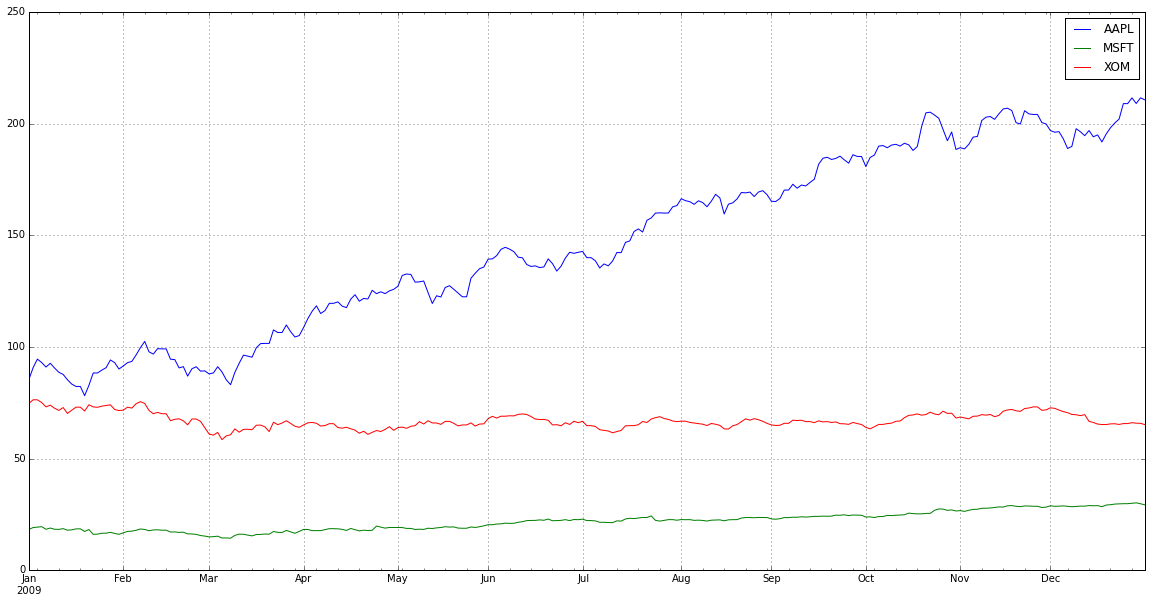

In [115]:
close_px.ix['2009'].plot()

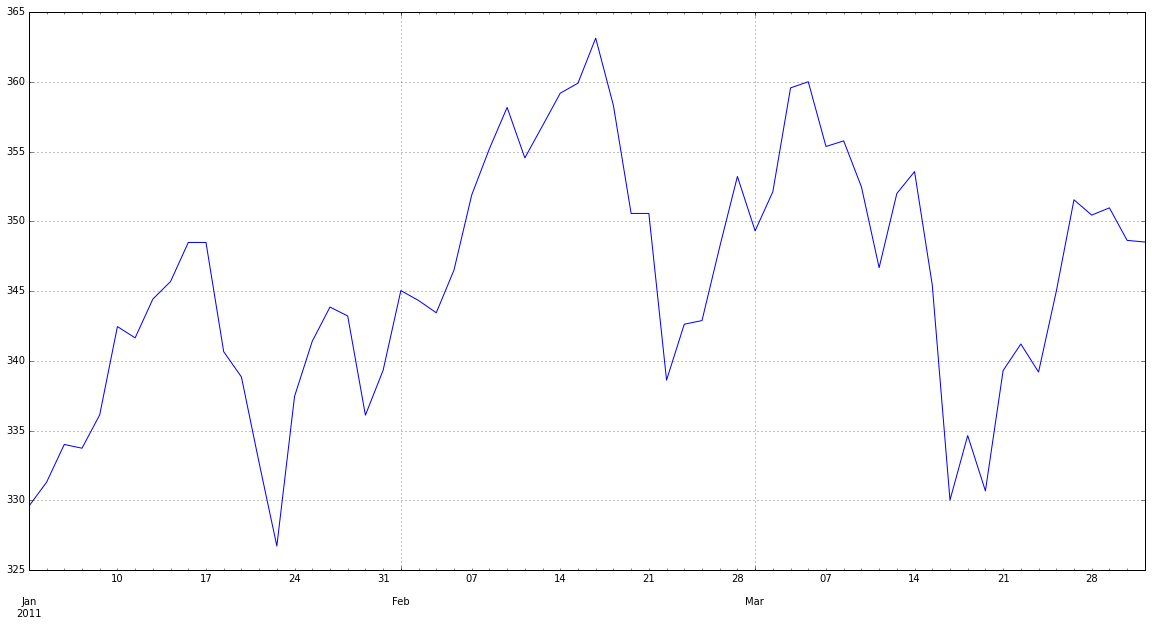

In [117]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

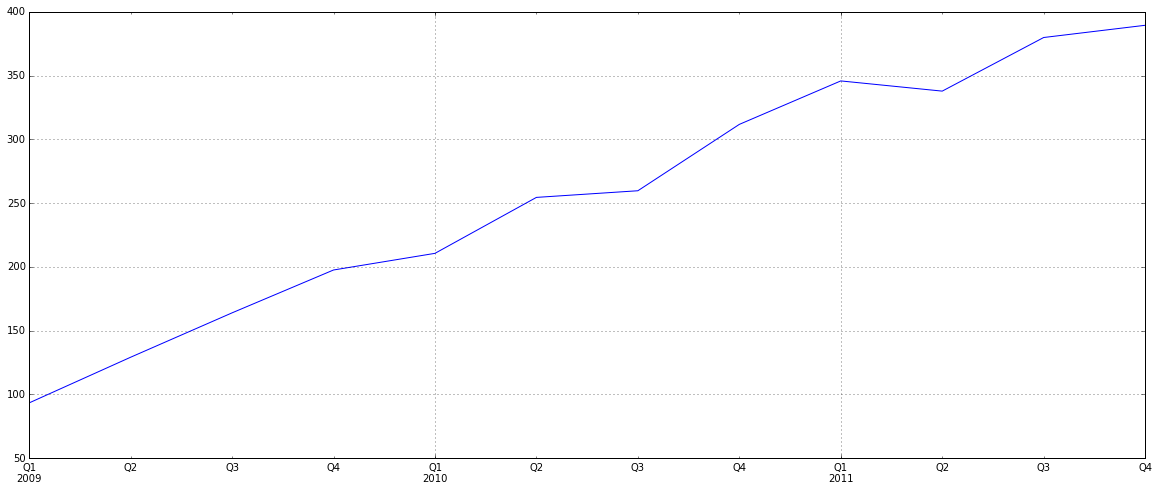

In [124]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009':].plot()

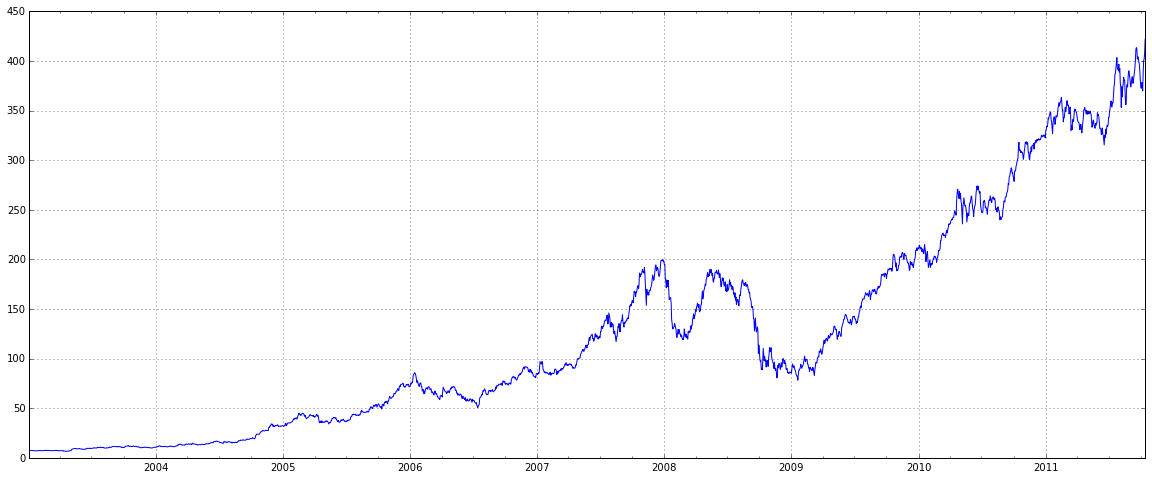

In [133]:
ax1=close_px.AAPL.plot()

In [134]:
pd.rolling_mean(close_px.AAPL, 250).plot(ax=ax1)

In [135]:
ax

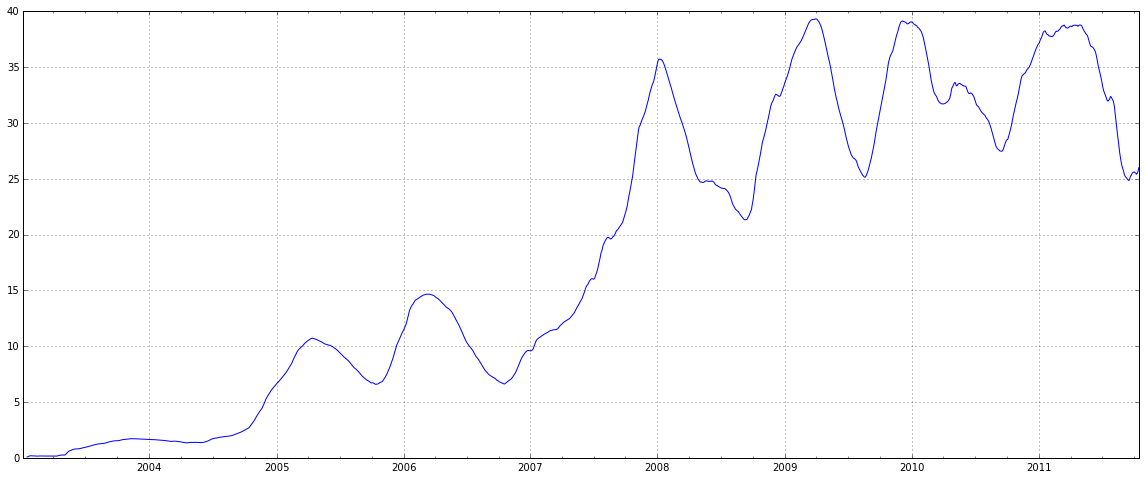

In [127]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250.plot()

In [136]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1

In [138]:
returns = close_px.pct_change()
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
2003-01-09,0.008242,0.029094,0.021159
2003-01-10,0.002725,0.001824,-0.013927
2003-01-13,-0.005435,0.008648,-0.004134
2003-01-14,-0.002732,0.010379,0.008993
2003-01-15,-0.010959,-0.012506,-0.013713


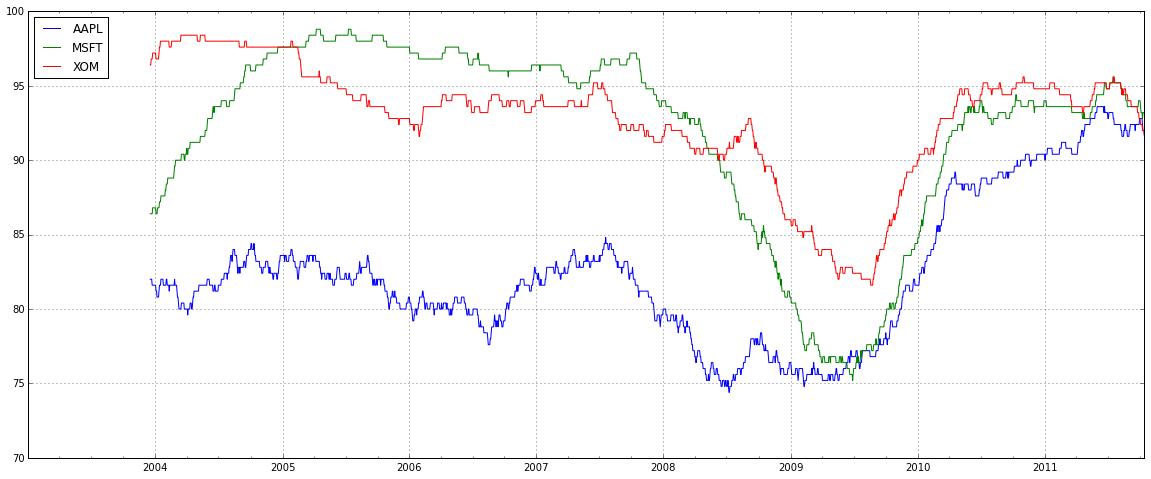

In [145]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns, 250, score_at_2percent) 
result.plot()

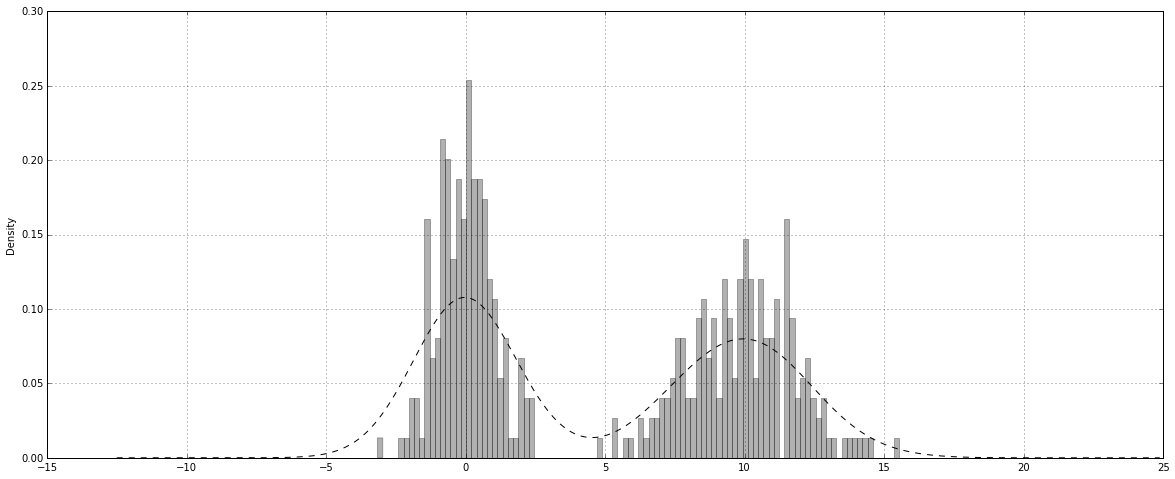

In [147]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

In [148]:
macro = pd.read_csv(current_path+'/pydata-book/ch08/macrodata.csv')

In [149]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

In [154]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11908b1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119d05150>]], dtype=object)

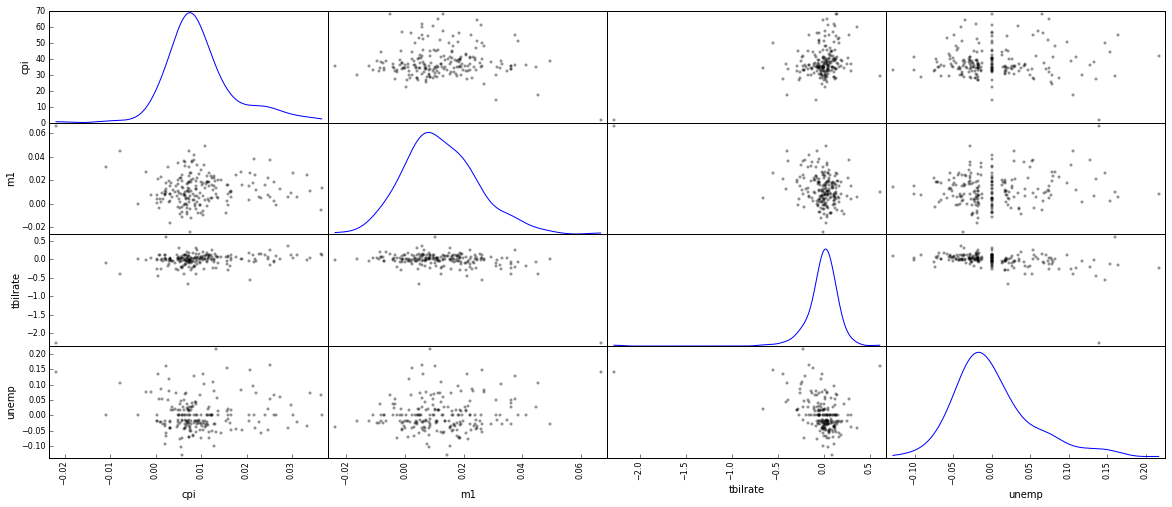

In [153]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)